# **Project Background**

This project is looking at utilising average houseprices to formulate a time series forcast for future potential house prices. Understanding the future houses prices of a region is really important to many stakeholders such as first time buyers, renters, home owners, local authorities, and private building contractors.

Being able to forcast potential changes in the market will help predict the price of houses and subsiquently help inform potential saving routines, development of houses, and whether to sell a house.

Hypothesis: New Builds for London are going to increase overtime, and are on a steady increasing trend overtime. The project uses data from the ONS and used multiple functions within Python to help validate the dataset.

In [1]:
# data manipulation and analysis python packages
import pandas as pd
import numpy as np
import scipy

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of all seaborn plots to 'seaborn-darkgrid'
plt.style.use('seaborn-darkgrid')

# modelling and evaluation
import statsmodels
import statsmodels.api as sm

<ipython-input-1-7ee28f0c23e1>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
Houseprice_df = pd.read_csv('London Dataset New Builds.csv', index_col='Quarter', parse_dates=True, infer_datetime_format=True)
Houseprice_df.head()

<ipython-input-2-5714a4ddbd7e>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Houseprice_df = pd.read_csv('London Dataset New Builds.csv', index_col='Quarter', parse_dates=True, infer_datetime_format=True)
<ipython-input-2-5714a4ddbd7e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Houseprice_df = pd.read_csv('London Dataset New Builds.csv', index_col='Quarter', parse_dates=True, infer_datetime_format=True)


,New dwellings
Quarter,
1993-01-01,72891
1993-04-01,78570
1993-07-01,84753
1993-10-01,75041
1994-01-01,72051


In [3]:
# Set the index frequency to Quarter Start
Houseprice_df.index.freq = 'QS'

In [4]:
# https://stackoverflow.com/a/71340523
gaps = pd.date_range(start=min(Houseprice_df.index),
                     end=max(Houseprice_df.index),
                     freq='QS').difference(Houseprice_df.index)
gaps

DatetimeIndex([], dtype='datetime64[ns]', freq='QS-JAN')

In [5]:
Houseprice_df.isnull().sum() # check for null values..

New dwellings    0
dtype: int64

In [6]:
Houseprice_df = Houseprice_df.sort_index() # sort by date index

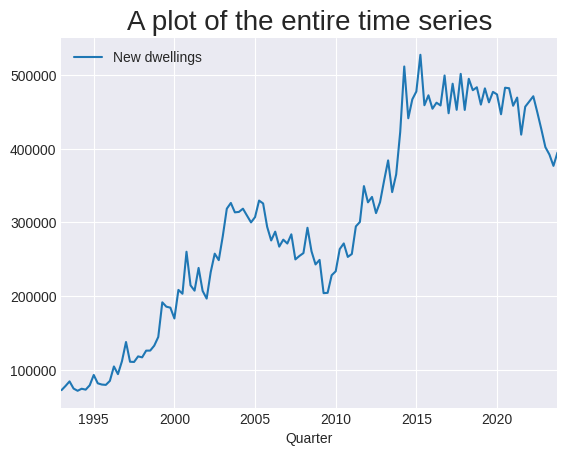

In [7]:
Houseprice_df.plot()

plt.title('A plot of the entire time series', fontsize = 20);

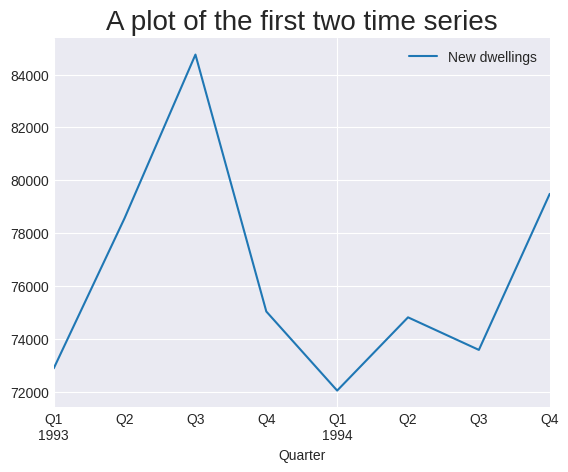

In [8]:
Houseprice_df.loc['1993':'1994'].plot()

plt.title("A plot of the first two time series", fontsize = 20);

In [9]:
Houseprice_df['4-MA'] =  Houseprice_df['New dwellings'].rolling(window=4,  center=True).mean()
Houseprice_df['6-MA'] =  Houseprice_df['New dwellings'].rolling(window=6,  center=True).mean()
Houseprice_df['12-MA'] = Houseprice_df['New dwellings'].rolling(window=12, center=True).mean()
Houseprice_df.head()

,New dwellings,4-MA,6-MA,12-MA
Quarter,,,,
1993-01-01,72891,NaN,NaN,NaN
1993-04-01,78570,NaN,NaN,NaN
1993-07-01,84753,77813.75,NaN,NaN
1993-10-01,75041,77603.75,76354.333333,NaN
1994-01-01,72051,76666.25,76470.666667,NaN


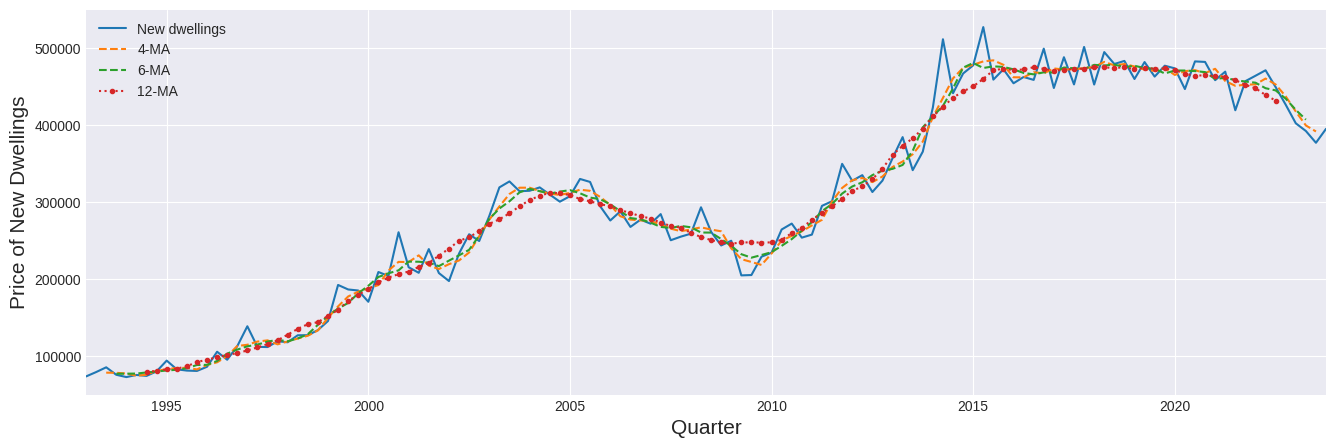

In [10]:
Houseprice_df.plot(style=['-','--','--',':.'],figsize=(16,5))

plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Price of New Dwellings', fontsize=15);

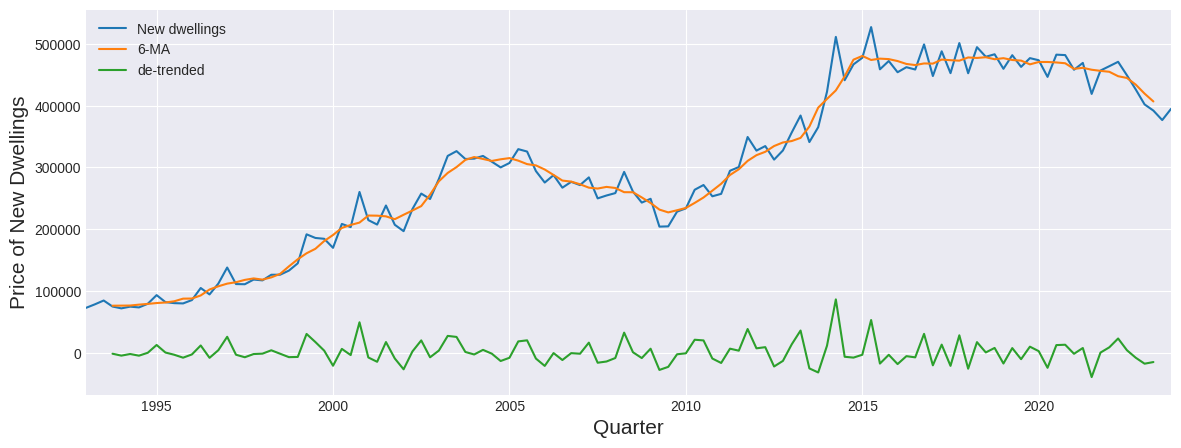

In [11]:
Houseprice_df['de-trended'] = Houseprice_df['New dwellings'] - Houseprice_df['6-MA']

Houseprice_df[['New dwellings','6-MA','de-trended']].plot(figsize=(14,5));

plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('Price of New Dwellings', fontsize = 15);

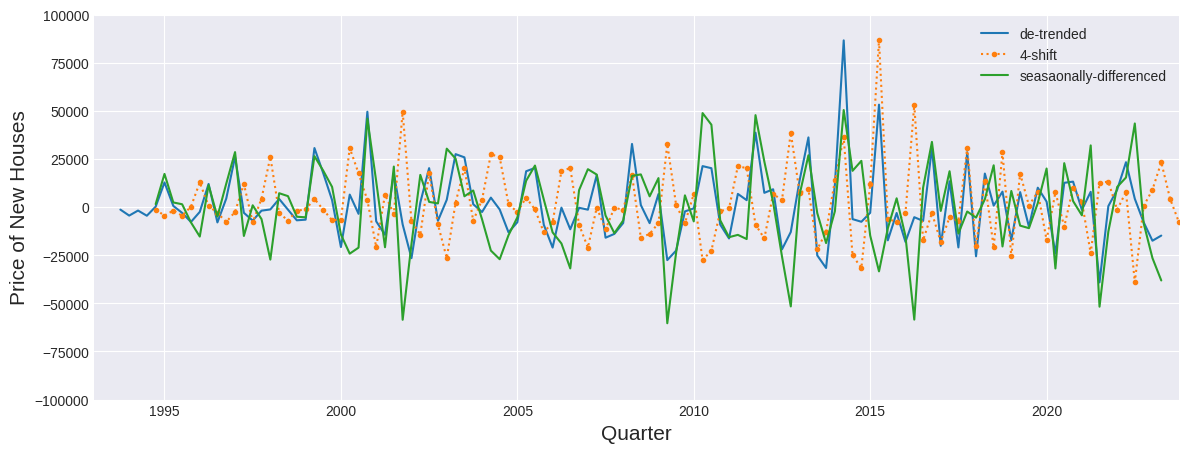

In [12]:
Houseprice_df['4-shift'] = Houseprice_df['de-trended'].shift(periods=4)

Houseprice_df['seasaonally-differenced'] = Houseprice_df['de-trended']- Houseprice_df['4-shift']

Houseprice_df[['de-trended', '4-shift', 'seasaonally-differenced']].plot(style=['-', ':.'],figsize=(14,5))


plt.ylim(-100000,100000)
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Price of New Houses', fontsize=15);

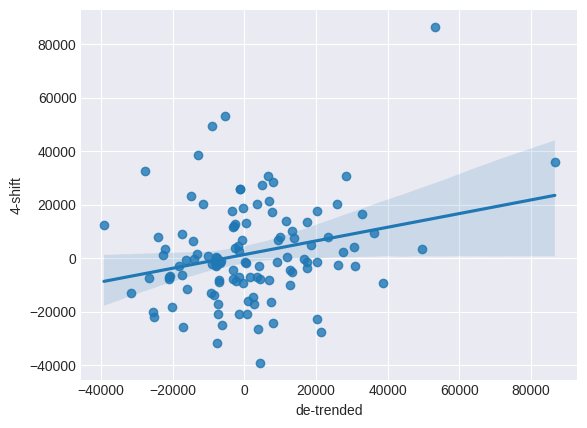

In [13]:
sns.regplot(data=Houseprice_df, x='de-trended', y='4-shift');

In [14]:
Houseprice_df['de-trended'].corr(Houseprice_df['4-shift']).round(2)

0.26

In [15]:
for shift in range(1,16):
    print(shift,':',Houseprice_df['de-trended'].corr(Houseprice_df['de-trended'].shift(shift)).round(2))

1 : -0.06
2 : -0.22
3 : -0.29
4 : 0.26
5 : -0.05
6 : 0.09
7 : -0.15
8 : 0.12
9 : -0.12
10 : 0.11
11 : -0.07
12 : 0.13
13 : -0.13
14 : 0.14
15 : -0.06


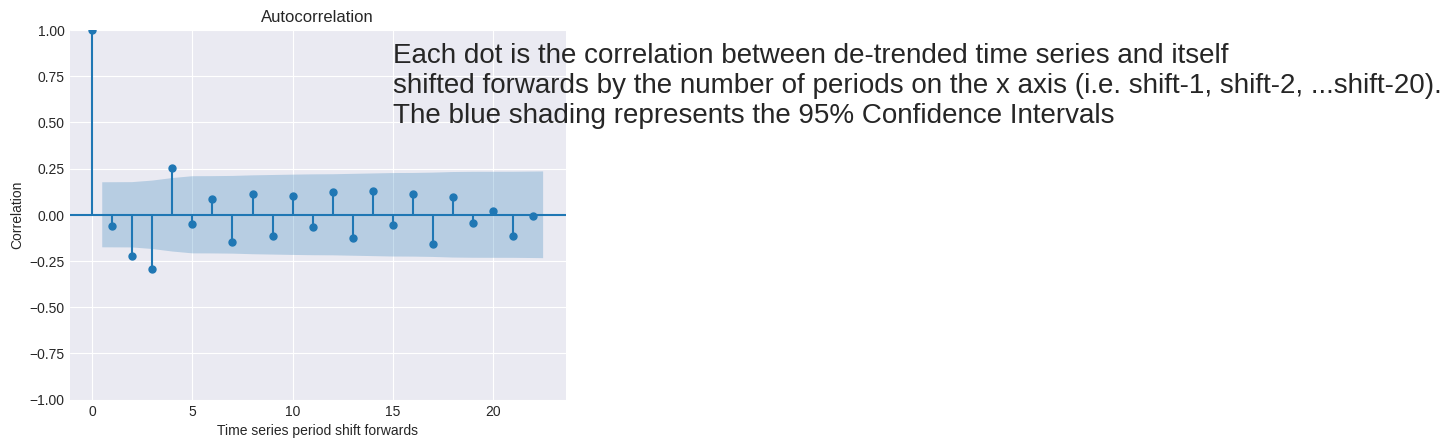

In [16]:
from statsmodels.graphics import tsaplots

tsaplots.plot_acf(Houseprice_df['de-trended'],missing='drop',lags=22,alpha=0.05)

plt.xlabel('Time series period shift forwards')
plt.ylabel('Correlation')

plt.text(15,0.5,"""Each dot is the correlation between de-trended time series and itself
shifted forwards by the number of periods on the x axis (i.e. shift-1, shift-2, ...shift-20).
The blue shading represents the 95% Confidence Intervals""", fontsize = 20);

<ipython-input-17-b7a6073d305a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Houseprice_df = pd.read_csv('London Dataset New Builds.csv', index_col='Quarter', parse_dates=True)


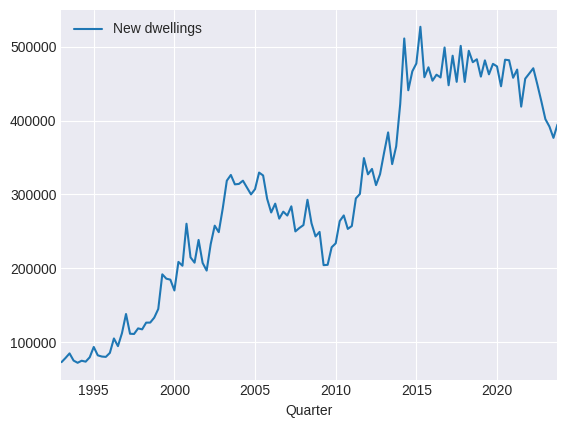

In [17]:
Houseprice_df = pd.read_csv('London Dataset New Builds.csv', index_col='Quarter', parse_dates=True)
Houseprice_df.index.freq='QS'
Houseprice_df.plot();

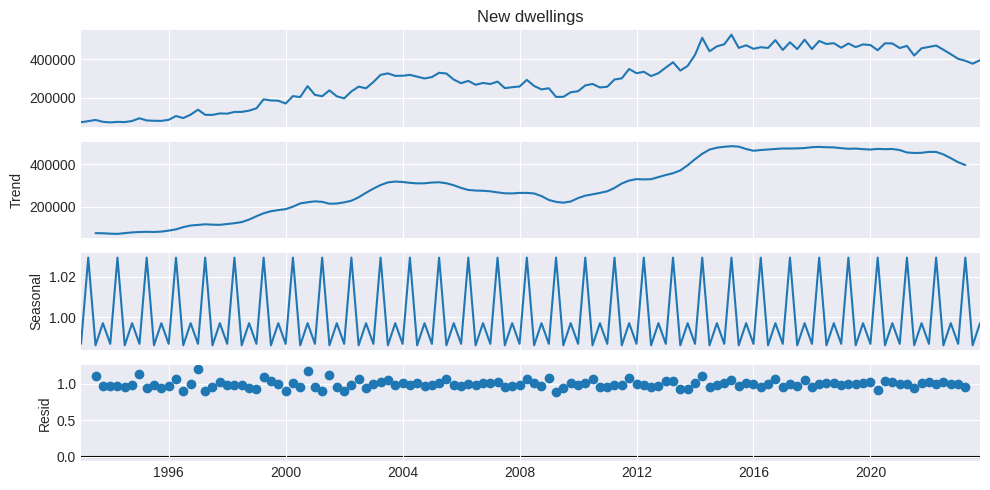

In [18]:
decomp=sm.tsa.seasonal_decompose(Houseprice_df['New dwellings'], model='multiplicative', period=4)
fig = decomp.plot()
fig.set_size_inches((10, 5))
fig.tight_layout()
plt.show()

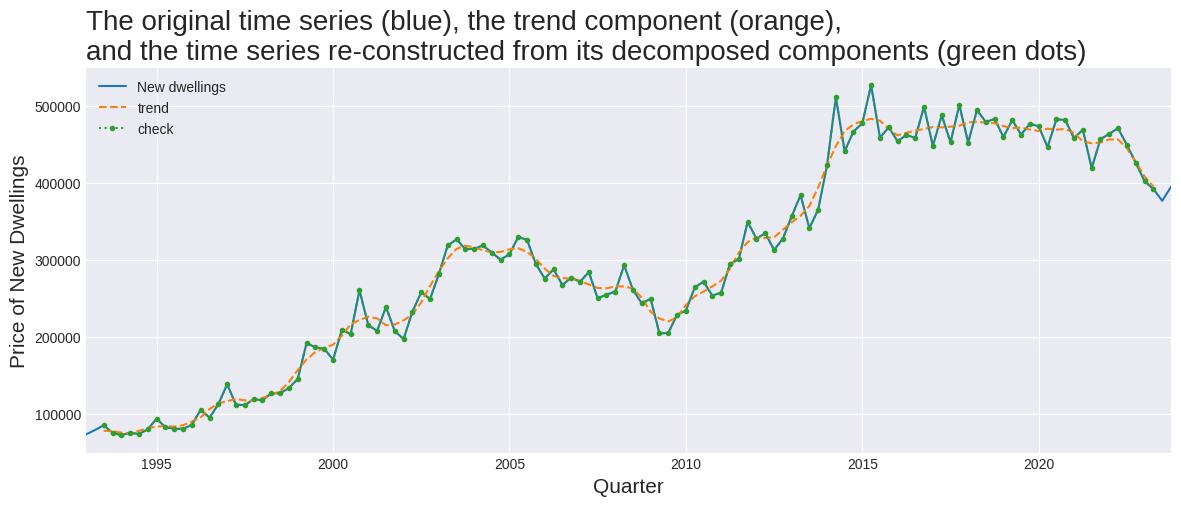

In [19]:
df=decomp.observed.to_frame().join(decomp.resid).join(decomp.trend).join(decomp.seasonal)
df['check'] = df['resid'] * df['trend'] * df['seasonal']
df[['New dwellings','trend','check']].plot(style=['-','--',':.'],figsize=(14,5))

plt.title("""The original time series (blue), the trend component (orange),
and the time series re-constructed from its decomposed components (green dots)""", fontsize = 20,loc='left')
plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('Price of New Dwellings', fontsize = 15);

In [20]:
train_data =  Houseprice_df[:'2019']
test_data = Houseprice_df['2020':]

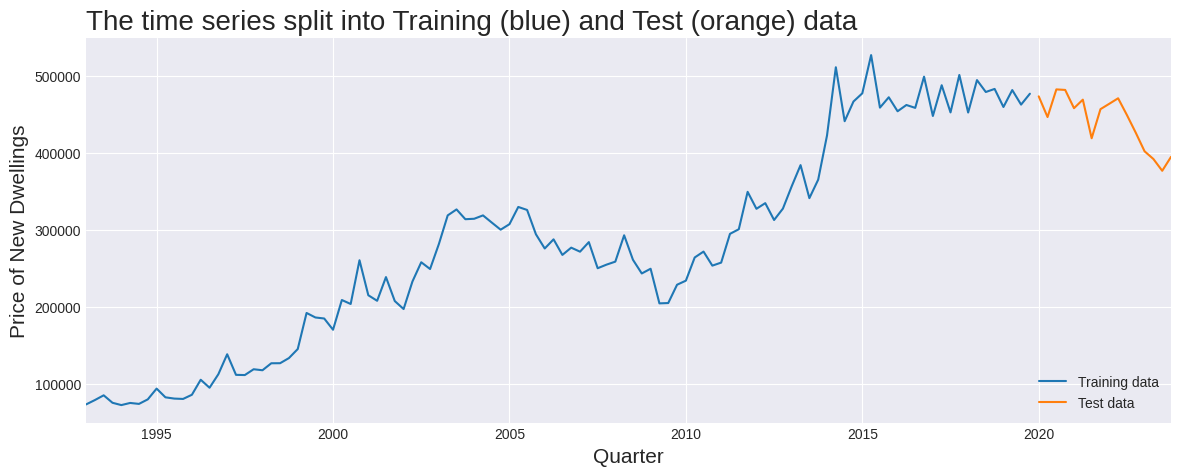

In [21]:
ax = train_data.plot()
test_data.plot(ax=ax,style=['-','--'],figsize=(14 ,5))
plt.legend(labels=['Training data', 'Test data'], loc=4)

plt.title("""The time series split into Training (blue) and Test (orange) data""", fontsize=20, loc='left')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Price of New Dwellings', fontsize=15);

In [22]:
ets_model_simple= sm.tsa.ETSModel(train_data['New dwellings'].astype('float64'),
                                error='add',
                                trend=None,
                                seasonal=None).fit()

ets_model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:          New dwellings   No. Observations:                  108
Model:                       ETS(ANN)   Log Likelihood               -1249.819
Date:                Wed, 08 May 2024   AIC                           2505.637
Time:                        07:31:45   BIC                           2513.683
Sample:                    01-01-1993   HQIC                          2508.900
                         - 10-01-2019   Scale                    659445860.455
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.6969      0.084      8.304      0.000       0.532       0.861
initial_level    7.336e+04   2.45e+04      2.996      0.003    2.54e+04    1.21e+05
===================================================================================
Ljung-Box (Q):                        0.81   Jarque-Bera (JB):                19.80
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               3.39   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

<ipython-input-23-f2bdec8e249c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['fitted_values'] = ets_model_simple.fittedvalues # add the fitted values from the model


,New dwellings,fitted_values
Quarter,,
1993-01-01,72891,73356.600000
1993-04-01,78570,73032.126532
1993-07-01,84753,76891.432825
1993-10-01,75041,82370.105432
1994-01-01,72051,77262.501786


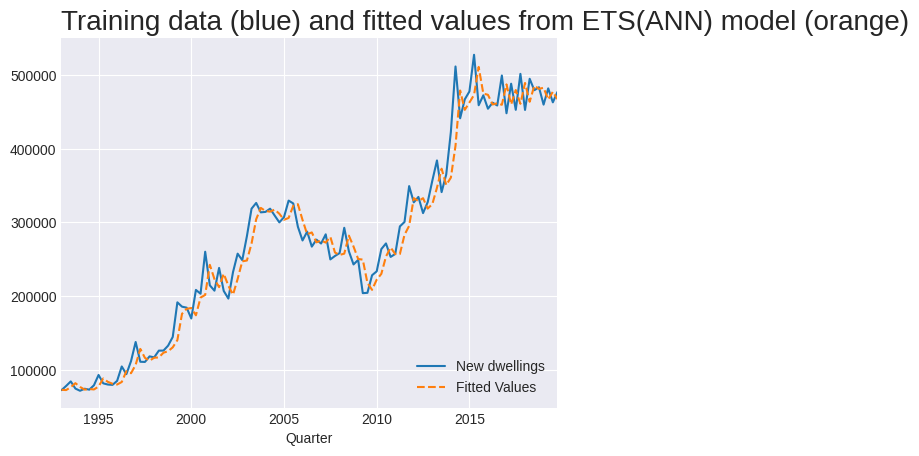

In [23]:
train_data['fitted_values'] = ets_model_simple.fittedvalues # add the fitted values from the model
train_data.plot(style=['-', '--'])

display(train_data.head())

plt.legend(labels=['New dwellings','Fitted Values'], loc=4)
plt.title('Training data (blue) and fitted values from ETS(ANN) model (orange)', fontsize=20, loc='left');

In [24]:
pd.options.mode.chained_assignment = None
test_data['ETS simple forecast (ANN)'] = ets_model_simple.forecast(steps=24)
test_data.head().style

,New dwellings,ETS simple forecast (ANN)
Quarter,,
2020-01-01 00:00:00,473494,473935.652518
2020-04-01 00:00:00,446567,473935.652518
2020-07-01 00:00:00,482525,473935.652518
2020-10-01 00:00:00,481836,473935.652518
2021-01-01 00:00:00,458106,473935.652518


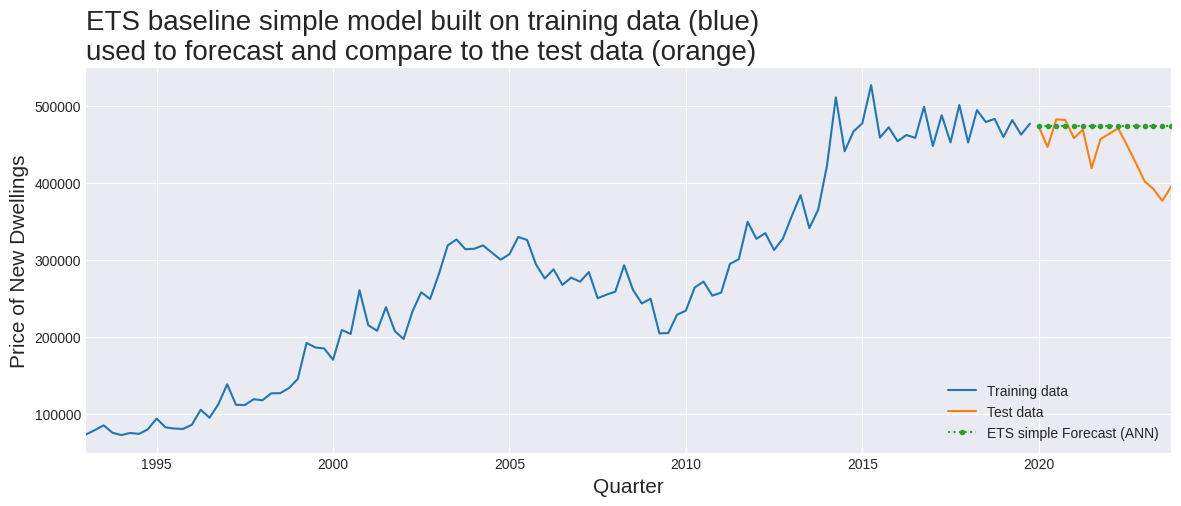

In [25]:
ax = train_data['New dwellings'].plot()
test_data.plot(ax=ax,style=['-',':.',':.'],figsize=(14,5))
plt.legend(labels=['Training data','Test data','ETS simple Forecast (ANN)'],loc=4)

plt.title("""ETS baseline simple model built on training data (blue)
used to forecast and compare to the test data (orange)""", fontsize = 20,loc='left')
plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('Price of New Dwellings', fontsize = 15);

70180.31  (Root Mean Squared Error RMSE)
13.63  (Mean Absolute Percentage Error MAPE)


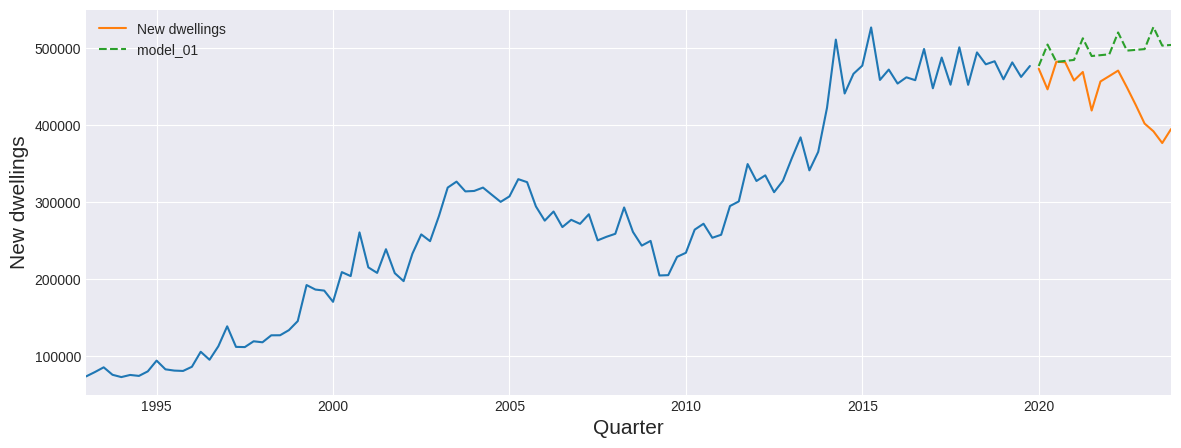

In [26]:
import numpy as np

# https://stats.stackexchange.com/a/294069
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 1: Build Model on training data
model_01= sm.tsa.ETSModel(train_data['New dwellings'].astype('float64'),
                          error='mul',
                          trend='mul',
                          damped_trend=True,
                          seasonal='mul',
                          seasonal_periods=4,
                          freq='QS').fit()

# 2: Use model to forecast across same time span as test data
test_data['model_01'] = model_01.forecast(steps=108) # does the forecast on the test data

# 3: Plot forecast against real values in test data
ax = train_data['New dwellings'].loc['1993':].plot()
test_data[['New dwellings','model_01']].plot(ax=ax,style=['-', '--', ':.'],figsize=(14, 5))
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('New dwellings', fontsize=15);

# 4: Compare forecast to actual values statistically in test data
rmse = sm.tools.eval_measures.rmse(test_data['New dwellings'], test_data['model_01']).round(2)
mape = mean_absolute_percentage_error(y_true=test_data['New dwellings'], y_pred=test_data['model_01'])
print(rmse, ' (Root Mean Squared Error RMSE)')
print(round(mape, 2), ' (Mean Absolute Percentage Error MAPE)')

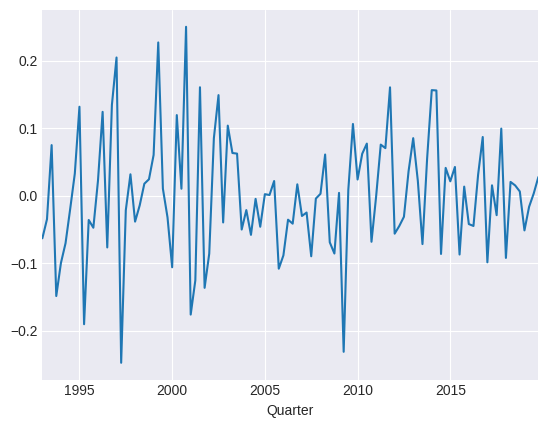

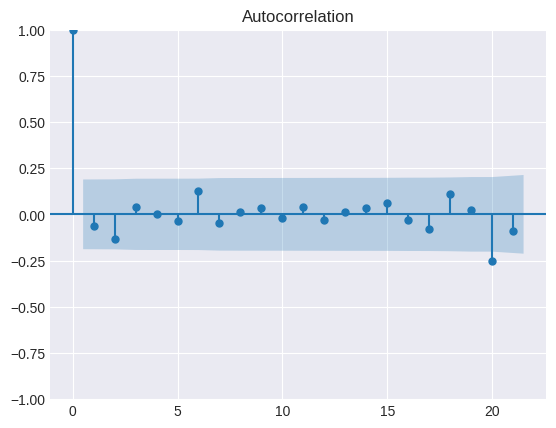

In [27]:
model_01.resid.plot();
statsmodels.graphics.tsaplots.plot_acf(model_01.resid,missing='drop',alpha=0.05,zero=True);

In [28]:
model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:          New dwellings   No. Observations:                  108
Model:                      ETS(MMdM)   Log Likelihood               -1230.091
Date:                Wed, 08 May 2024   AIC                           2482.183
Time:                        07:31:46   BIC                           2511.686
Sample:                    01-01-1993   HQIC                          2494.145
                         - 10-01-2019   Scale                            0.008
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.8917      0.114      7.830      0.000       0.668       1.115
smoothing_trend     8.917e-05        nan        nan        nan         nan         nan
smoothing_seasonal  1.083e-05        nan        nan        nan         nan         nan
damping_trend          0.9773      0.013     72.761      0.000       0.951       1.004
initial_level       7.388e+04        nan        nan        nan         nan         nan
initial_trend          1.0542      0.025     42.399      0.000       1.005       1.103
initial_seasonal.0     1.0013        nan        nan        nan         nan         nan
initial_seasonal.1     1.0027        nan        nan        nan         nan         nan
initial_seasonal.2     1.0541        nan        nan        nan         nan         nan
initial_seasonal.3     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                        4.98   Jarque-Bera (JB):                 1.63
Prob(Q):                              0.76   Prob(JB):                         0.44
Heteroskedasticity (H):               0.35   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [29]:
# Fit a final ETS model with chosen parameters
final_model= sm.tsa.ETSModel(Houseprice_df['New dwellings'].astype('float64'),
                             error='mul',
                             trend='mul',
                             damped_trend=False,
                             seasonal='mul',
                             seasonal_periods=4,
                             freq='QS').fit()

In [30]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:          New dwellings   No. Observations:                  124
Model:                       ETS(MMM)   Log Likelihood               -1419.123
Date:                Wed, 08 May 2024   AIC                           2858.246
Time:                        07:31:47   BIC                           2886.449
Sample:                    01-01-1993   HQIC                          2869.703
                         - 10-01-2023   Scale                            0.007
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.8853      0.105      8.462      0.000       0.680       1.090
smoothing_trend        0.0293      0.027      1.098      0.272      -0.023       0.082
smoothing_seasonal  1.147e-05        nan        nan        nan         nan         nan
initial_level       7.388e+04        nan        nan        nan         nan         nan
initial_trend          1.0324      0.022     46.987      0.000       0.989       1.075
initial_seasonal.0     1.0111        nan        nan        nan         nan         nan
initial_seasonal.1     0.9985        nan        nan        nan         nan         nan
initial_seasonal.2     1.0481        nan        nan        nan         nan         nan
initial_seasonal.3     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                        5.32   Jarque-Bera (JB):                 2.82
Prob(Q):                              0.72   Prob(JB):                         0.24
Heteroskedasticity (H):               0.30   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [31]:
pred = final_model.get_prediction(start='2024', end='2025')
df = pred.summary_frame(alpha=0.05)

df.head(8)

,mean,mean_numerical,pi_lower,pi_upper
2024-01-01,390265.890814,388890.802091,315269.724380,457556.278198
2024-04-01,410275.105906,411293.952016,315293.279239,503644.655085
2024-07-01,392046.243720,391978.780124,292492.427020,509365.633007
2024-10-01,398207.655509,398554.903404,284240.600523,544201.873105
2025-01-01,395021.359268,396448.318504,267508.658502,560892.019142


The overall trend shows that weak growth is excpected, with a larger possibility of reducing and seeing a reduction in property vlaues. This is different to what is occuring in both the average property price and First Time buyers as their respected models showerd them increasing in value.

This also proves the hypthosis incorrect as prices are trending down.

The 95% accurate range is relative wide. This will impact the types of decsions and informed actions taken off the back of the analysis model. This is because the range of potential values is so varied it becomes hard to perform action based on this.

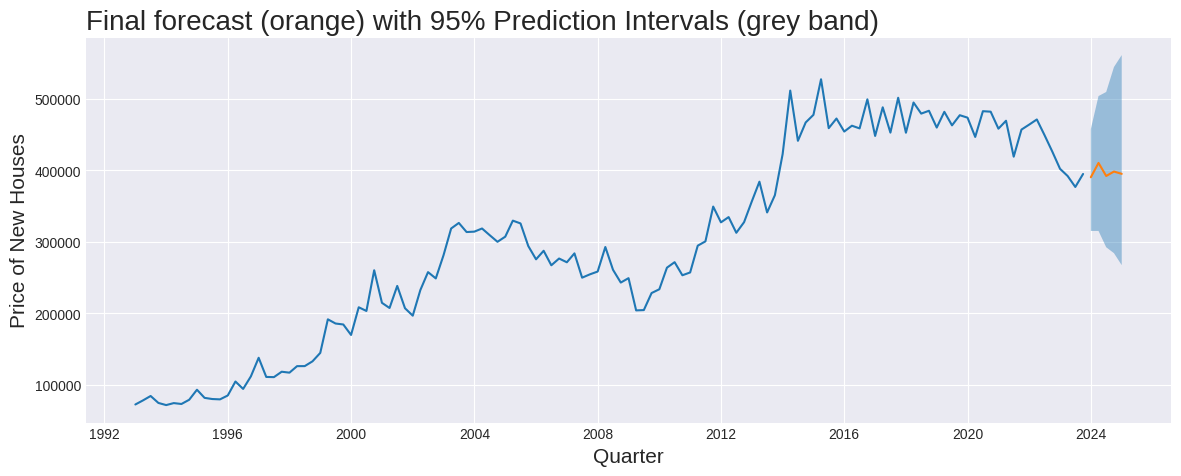

In [32]:
fig, ax = plt.subplots(figsize=(14,5))

ax.plot(Houseprice_df['New dwellings'])
ax.plot(df['mean'])
ax.fill_between(df.index,y1=df['pi_lower'],y2=df['pi_upper'], alpha=0.4)

plt.title("""Final forecast (orange) with 95% Prediction Intervals (grey band)""", fontsize = 20,loc='left')
plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('Price of New Houses', fontsize = 15);